# DBSCAN
#### 밀도 기반 군집화의 대표적인 알고리즘 DBSCAN(Density Based Spatial Clustering of Applications with Noise)는 간단하고 직관적인 알고리즘으로 구성되어 있으나 데이터의 분포가 기하하적으로 복잡한 데이터 세트에도 효과적으로 군집화가 가능하다.
#### 다음과 같이 내부의 원 모양과 외부의 원 모양 형태의 데이터 세트를 군집화한다고 할 때, 앞에서 소개한 K 평균, 평균 이동, GMM은 효과적으로 군집화 하기 어렵다.
#### DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반하는 알고리즘으로 하고 있어서 충분히 표현 가능하다.

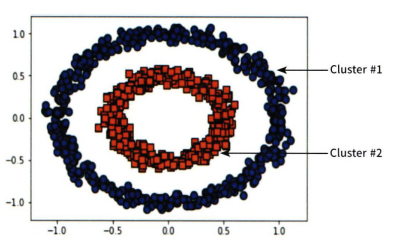
#### DBSCAN를 구성하는 중요한 파라미터는 아래와 같다.
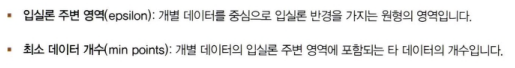

#### 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인터를 아래와 같이 정의한다.
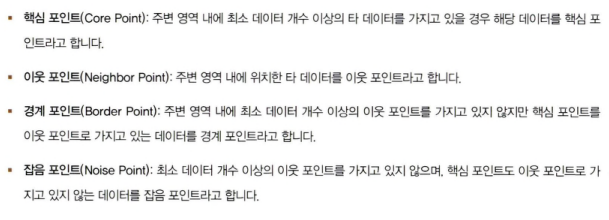

#### 1. P1에서 P12까지 12개의 데이터에 대해서 DBSCAN 군집화를 적용할 것이다. 그리고 특정 입실론 반경 내에 포함될 최소 데이터 세트를 6개(자기 자신 포함) 가정한다.
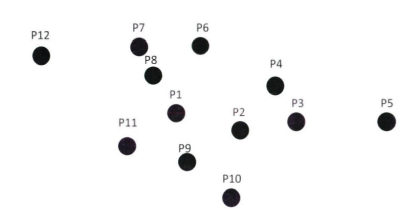

#### 2. P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개로 최소 데이터 5개 이상을 만족하므로 P1 데이터는 핵심 포인트(Core)이다.
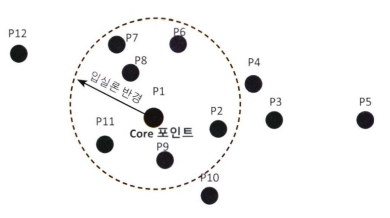

#### 3. P2 데이터는 반경 6개를 가지고 있어서 핵심 포인트이다.
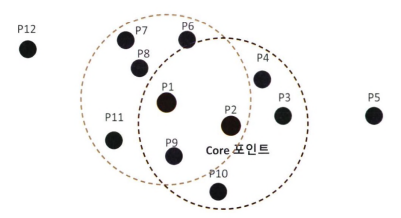

#### 4. 핵심 포인트 P1의 이웃 데이터 포인트 P2 역시 핵심 포인트일 경우 P1에서 P2로 연결해 직접 접근이 가능하다.
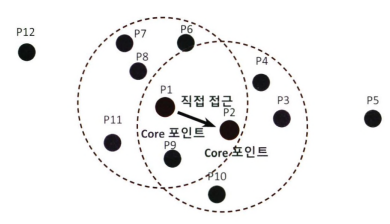

#### 5. 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성해 나가는 것이 DBSCAN 군집화 방식이다.
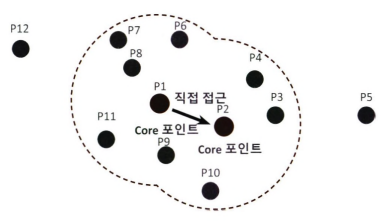

#### 6. P3 데이터의 경우 반경 내 데이터가 2개이므로 핵심 포인트가 될 수 없다. 하지만 이웃 데이터 중 핵심 포인트인 P2를 가지고 있기 때문에 경계 포인트가 될 수 있다. 경계 포인트는 군집의 외곽을 형성한다.
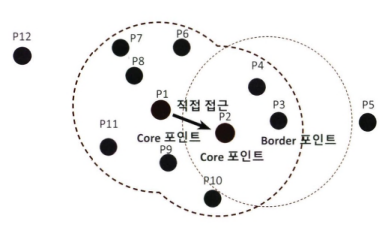

#### 7. P5의 경우 핵심 포인트와 경계 포인트가 아니기 때문에 잡음 포인트라고 한다.
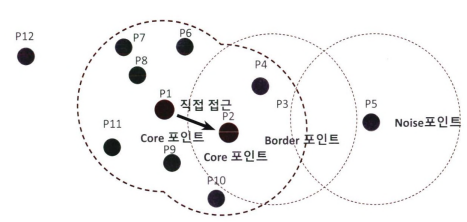

## DBSCAN 적용 - 붓꽃 데이터 세트

In [1]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### eps=0.6, min_samples=8로 설정 ( 일반적으로 eps값은 1이하의 값으로 설정)

In [3]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


#### 군집 레이블이 -1은 노이즈에 속하는 군집을 의미한다.
#### DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정한다. 붓꽃 데이터 세트는 군집을 3개로 하는 것 보다는 2개로 하는 것이 더 효율적이다.

#### 2차원 평면에서 표현을 위해 PCA를 이용해 2개의 피처로 압축한 뒤, 시작화를 진행하자

In [4]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

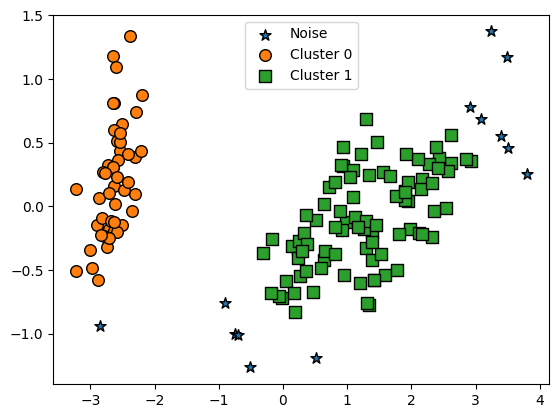

In [5]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

#### 별표로 표현된 값이 노이즈이다. DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋다.
#### 중요한 것은 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 것이다.
#### 일반적으로 eps가 크다면 반경이 커저 포함되는 데이터가 많아지고 노이즈는 작다.
#### min_samples를 크게하면 주어진 반경 내에 데이터를 더 많이 포함되어야 하기 때문에 노이즈가 더 커진다.

#### 다음은 eps를 기존 0.6에서 0.8로 증가시키면 노이즈가 더 작아진다.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


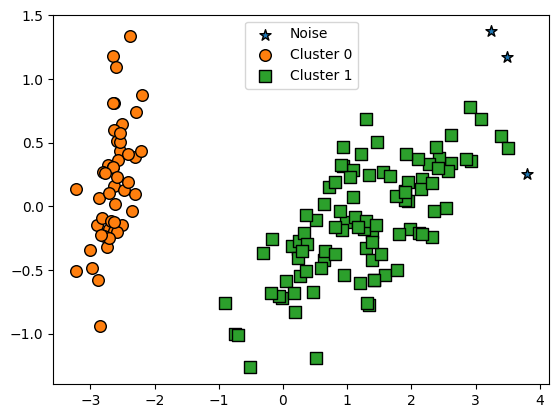

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

#### eps를 0.6으로 두고, min_samples를 16으로 늘려보자

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


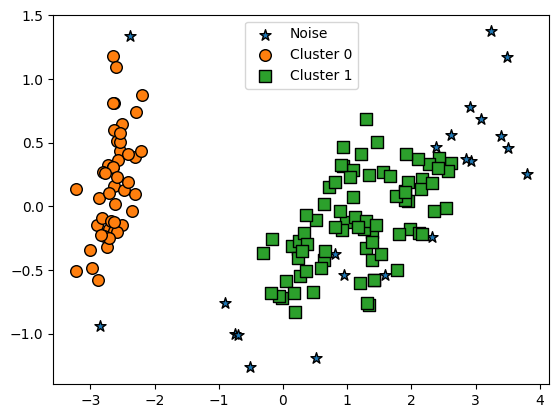

In [7]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

## DBSCAN 적용 - make_circles() 데이터 세트
#### make_circles 함수를 이용해 내부 원과 외부 원 형태로 되어 있는 2차원 데이터 세트를 만들어 보자
#### 2개의 피처만 존재하고, 별도의 피처 개수를 지정할 필요가 없다.
#### 파라미터 noise는 노이즈 데이터 세트의 비율이고, factor는 외부 원과 내부 원의 scale 비율이다.

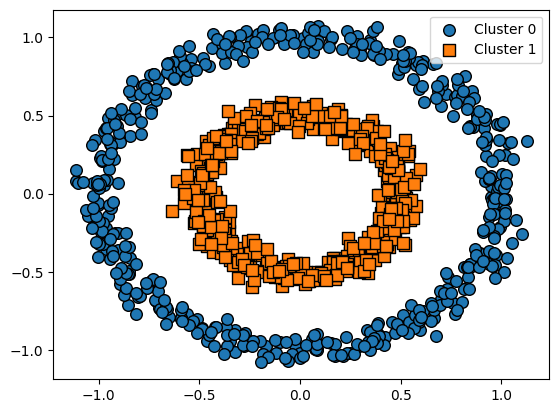

In [11]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

#### 데이터 세트 생성을 완료했고, 먼저 K-평균과 GMM을 사용해서 군집화를 진행해보자
### K-평균

C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


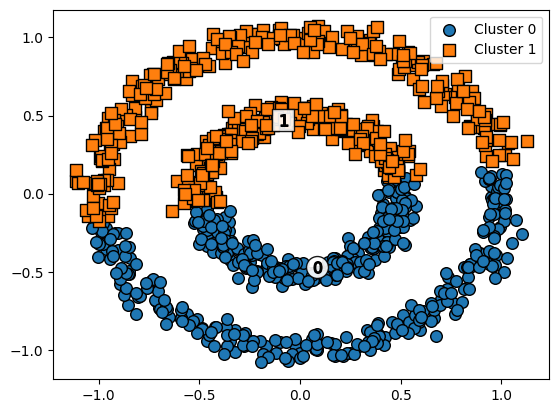

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

#### 위, 아래 군집 중심을 기반으로 군집화가 진행되었다. 거리 기반 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 힘들다
### GMM

C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


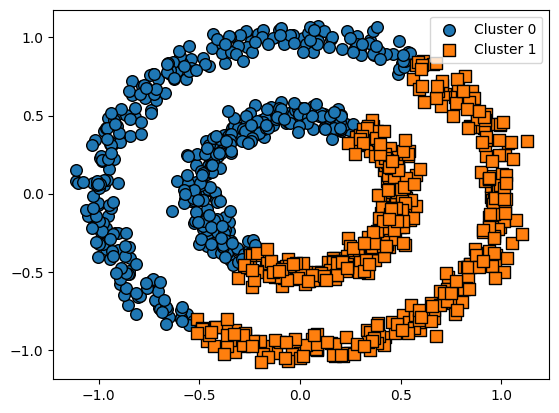

In [14]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

### DBSCAN

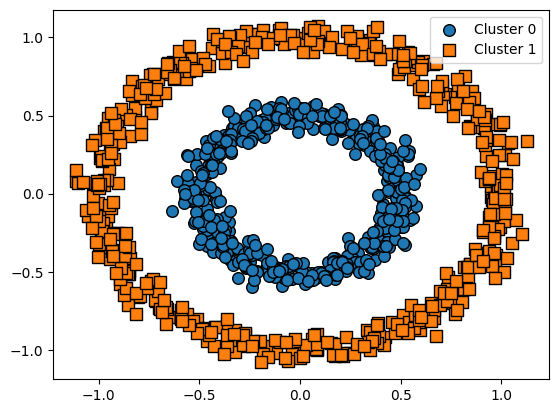

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

#### DBSCAN 군집화를 적용해 원하는 방향으로 군집화를 수행했다.